In [1]:
import sys
import matplotlib.pyplot as plt
import time
sys.path.append('../bin/')
from make_figures import *
from classify import *
from utils import *
from load_data import *
from estimate_covariance import *

In [2]:
input_data = 'Gaussian_mnist'
num_classes= 10
DATA_SHAPE = 28*28
num_comp   = [1,5,10,20,50,200,500,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML','TRUE','LW','NERCOME']
pca        = True
masks      = [False]

In [3]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10
if input_data == 'Gaussian_mnist':
    load_data = load_Gaussian_mnist

In [7]:
x_train, targets_train, x_test, targets_test, tru_covs = load_data()
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(50000,) (50000, 784) (10000, 784) (10000,)


In [8]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [13]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,tru_cov=tru_covs['covs'], pca=pca,tru_mean=tru_covs['means'], rerun=True)

../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_0.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_1.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_2.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_3.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_4.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_5.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_6.pkl
no zero variance pixels in data
no zero variance pixels in data
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_7.pkl


True

In [14]:
cov = load_covariance('TRUE',False,covpath,label=0)
cov.dist(tru_covs['covs'][0])

0.0

In [ ]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=True)

../outputs/Gaussian_mnist/classification/results_test.pkl ../outputs/Gaussian_mnist/classification/
ML inpainted 1
ML inpainted 5
ML inpainted 10
ML inpainted 20
ML inpainted 50
ML inpainted 200
ML inpainted 500
ML inpainted 784
pca 1
pca 5
pca 10
pca 20
pca 50
pca 200
pca 500
pca 784
TRUE inpainted 1
TRUE inpainted 5
TRUE inpainted 10
TRUE inpainted 20
TRUE inpainted 50
TRUE inpainted 200
TRUE inpainted 500
TRUE inpainted 784
LW inpainted 1
LW inpainted 5
LW inpainted 10
LW inpainted 20
LW inpainted 50
LW inpainted 200


../outputs/Gaussian_mnist/figures/MLvsTRUE_inpainted.png


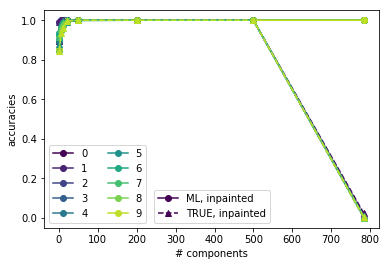

In [14]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted.png')

../outputs/Gaussian_mnist/figures/MLvsPCA_inpainted_test.png


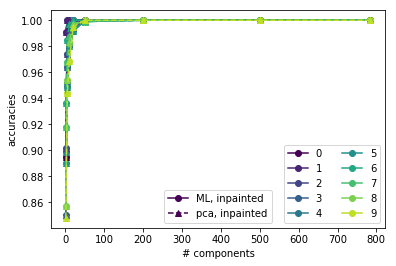

In [15]:
_= make_acc_figure(['ML','pca'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsPCA_inpainted_test.png')

../outputs/Gaussian_mnist/figures/MLvsLW_inpainted_test.png


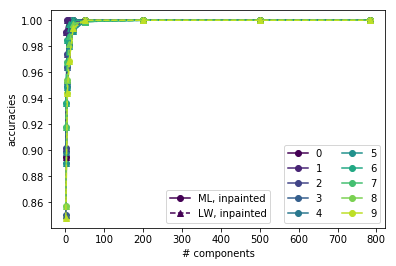

In [16]:
_= make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted_test.png')

../outputs/Gaussian_mnist/figures/MLvsNERCOME_inpainted_test.png


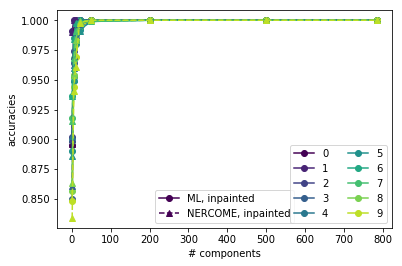

In [17]:
_= make_acc_figure(['ML','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsNERCOME_inpainted_test.png')

In [31]:
results = perform_classification(x_train, targets_train, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='train', rerun=False)

../outputs/Gaussian_mnist/classification/results_train.pkl ../outputs/Gaussian_mnist/classification/


../outputs/Gaussian_mnist/figures/MLvsTRUE_inpainted_train.png


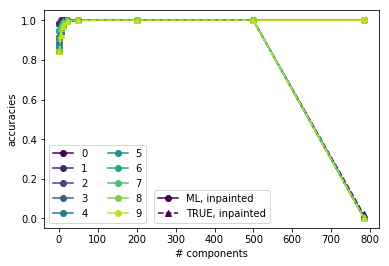

In [32]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted_train.png')

../outputs/Gaussian_mnist/figures/MLvsNERCOME_inpainted_train.png


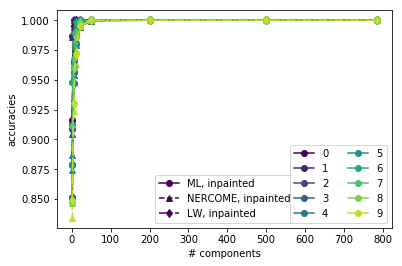

In [33]:
_=make_acc_figure(['ML','NERCOME','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsNERCOME_inpainted_train.png')

In [8]:
covs=[]
print(covpath)
for mode in modes:
    print(mode)
    covs.append(load_covariance(mode,False,covpath,label=0))

../outputs/Gaussian_mnist/covariance_estimator/
ML
TRUE
LW
NERCOME


In [9]:
x_train, y_train, x_test, y_test, tru_covs = load_Gaussian_mnist()

In [10]:
covpathmnist   = '../outputs/mnist/covariance_estimator/'
filename       = os.path.join(covpathmnist,'cov_estimate_%s_%d.pkl'%('ML',0))
covin          = pkl.load(open(filename, 'rb'))
print(filename)
covin.dist(tru_covs['covs'][0])

../outputs/mnist/covariance_estimator/cov_estimate_ML_0.pkl


0.0

In [11]:
for ii in range(len(covs)):
    print(modes[ii])
    print(covin.dist(covs[ii].cov))

ML
0.556896704095
TRUE
0.0
LW
0.567060295777
NERCOME
0.58162496366


In [3]:
covpathmnist   = '../outputs/mnist/covariance_estimator/'
filename       = os.path.join(covpathmnist,'cov_estimate_%s_%d.pkl'%('ML',0))
covin          = pkl.load(open(filename, 'rb'))
print(filename)
x_train, y_train, x_test, y_test, tru_covs = load_Gaussian_mnist()
covin.dist(tru_covs['covs'][0])

../outputs/mnist/covariance_estimator/cov_estimate_ML_0.pkl


0.0